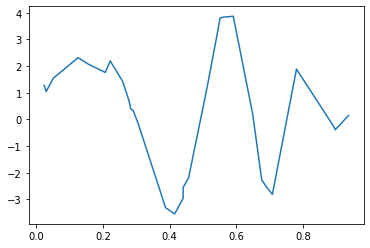

In [242]:
import numpy as np
import math
from matplotlib import pyplot as plt
import itertools
import sys

n = 30 
np.random.seed(3)
xs = np.random.uniform(size = 30)
xs = np.sort(xs)

ys = 4*np.sin(math.pi*xs)*np.cos(6*math.pi*xs**2)  + np.random.uniform(0,1, size = 30)

true_y = ys +  np.random.uniform(0,1, size = 30)

plt.plot(xs,ys)

In [226]:
def kernelRidgeRegression(K, X_labels, reg_lambda = 0):
    # TODO: polyfeature + normalization?
    n = K.shape[0]
    assert K.shape[0] == K.shape[1], "incorrect kernel shape"
    return np.linalg.inv(K+reg_lambda*np.eye(n)).dot(X_labels)


        
def poly_kernel(X, d=0):
    if len(X.shape) < 2:  # fir n x 1 data
        X = np.expand_dims(X, axis = 1)
    n = X.shape[0]
    K = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            K[i][j] = np.power(1+ X[i].T.dot(X[j]), d)
    return K

def poly_kernel2(X, z, d=0):
    if len(X.shape) < 2:  # fir n x 1 data
        X = np.expand_dims(X, axis = 1)
    if len(z.shape) == 0:
        z = np.expand_dims(z, axis = 0)
    n = z.shape[0]
    d = X.shape[0]
    K = np.zeros((n,d))
    assert gamma > 0, "gamma should be larger than 0"
    for i in range(n):
        for j in range(d):
            if len(X.shape) == 2:
                K[i][j] = np.power(1+ X[j].T.dot(z[i]), d)
            else: # for  n x 1 data input
                K[i][j] = np.power(1+ X[j].T.dot(z[i]), d)
    return K

def rbf_kernel(X, gamma=1):
    if len(X.shape) == 0:
        X = np.expand_dims(X, axis = 0)
    n = X.shape[0]
    K = np.zeros((n,n))
    assert gamma > 0, "gamma should be larger than 0"
    for i in range(n):
        for j in range(n):
            if len(X.shape) == 2:
                K[i][j] = np.exp(-gamma * np.linalg.norm(X[i]-X[j], 2 )**2)
            else: # for  n x 1 data input
                K[i][j] = np.exp(-gamma * np.absolute(X[i]-X[j])**2)
    return K

def rbf_kernel2(X, z, gamma=1):
    if len(z.shape) == 0:
        z = np.expand_dims(z, axis = 0)
#         print("z: ", z)
    n = z.shape[0]
    d = X.shape[0]
    K = np.zeros((n,d))
    assert gamma > 0, "gamma should be larger than 0"
    for i in range(n):
        for j in range(d):
            if len(X.shape) == 2:
                K[i][j] = np.exp(-gamma * np.linalg.norm(X[j]-z[i], 2 )**2)
            else: # for  n x 1 data input
                K[i][j] = np.exp(-gamma * np.absolute(X[j]-z[i])**2)
    return K

def predict(K, alpha):
    n = K.shape[0]
    if len(K.shape) == 1: # one kernel value
        y = np.sum(alpha.dot(K))
        return y
    else: # kernel matrix, predict all data from the kernel
        ys = np.zeros(n)
        for i in range(n): # this i is not what's in formula, it's data point to predict
            ys[i] = alpha.dot(K[i])
        return ys

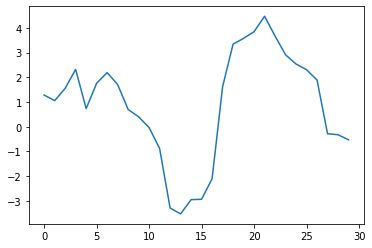

In [300]:
n = 30
rand_idx = np.random.randint(30, size = 30)
xs_bs = xs[rand_idx]


ys_bs = ys[rand_idx]

sort_idx = np.argsort(xs_bs)
xs_bs = xs_bs[sort_idx]
ys_bs = ys_bs[sort_idx]
K =rbf_kernel(xs_bs, 100)
alpha = kernelRidgeRegression(K, ys_bs, reg_lambda = 1e-13)


K = rbf_kernel2(xs_bs, xs, 100)
plt.plot(predict(K, alpha))
# plt.plot(predic_rbf(best_alpha, xs_bs,   ))

[0.02398188 0.02398188 0.02987621 0.15686774 0.15686774 0.20724288
 0.22195788 0.27848728 0.29090474 0.29090474 0.30636353 0.38797126
 0.38797126 0.4151012  0.44045372 0.44080984 0.54464902 0.54464902
 0.55885409 0.64914405 0.6762549  0.69313792 0.69313792 0.69313792
 0.70814782 0.70814782 0.78031476 0.89294695 0.89294695 0.93638365]
[ 1.27705793  1.27705793  1.04721517  2.07047142  2.07047142  1.76440696
  2.19183158  0.69526507  0.32937163  0.32937163 -0.1780181  -3.31303909
 -3.31303909 -3.54496975 -2.96234051 -2.5486971   3.32861199  3.32861199
  3.83275373  0.19684045 -2.27219952 -2.5815892  -2.5815892  -2.5815892
 -2.8114315  -2.8114315   1.88763348 -0.28119047 -0.28119047  0.1471845 ]
[  4171.91933531   4161.7577288  -11200.57926009  15859.89541954
  15860.39695912 -51158.18071302    913.27365081  -6675.6162683
   7390.41985586   7390.43103404  25309.09466495   5058.28960262
   5058.28983356 -19158.6592261  -27032.73883167  12965.58589087
   4061.6086031    4061.60859802  11232.

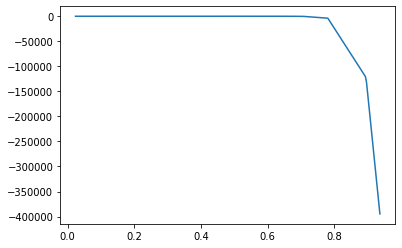

In [237]:
n = 30
rand_idx = np.random.randint(30, size = 30)
xs_bs = xs[rand_idx]
ys_bs = ys[rand_idx]

sort_idx = np.argsort(xs_bs)
xs_bs = xs_bs[sort_idx]
ys_bs = ys_bs[sort_idx]
print(xs_bs)
print(ys_bs)

K = poly_kernel(xs_bs, 27)
alpha = kernelRidgeRegression(K, ys_bs, reg_lambda = 1e-5)

# K = poly_kernel(xs, 27)
K = poly_kernel2(xs_bs, xs, 27)
# plt.plot(xs_bs, ys_bs)
print(alpha)
print("K ", K)
plt.plot(xs, predict(K, alpha))


# K = poly_kernel(xs, 27)
# alpha = kernelRidgeRegression(K, ys, reg_lambda = 1e-5)
# predict_ys = predict(K, alpha)

In [238]:
# A3 a
# grid search parameters for rbf kernel
rbf_d = dict()
# d["lambda"] = (2,3)
# d["b"] = (5,6)
rbf_d["reg_lambda"] = tuple(10**(-i) for i in range(16))
rbf_d["gamma"]=  tuple(10**(-i) for i in range(-3,16))



keys = rbf_d.keys()
values = rbf_d.values()

search_grid = list(itertools.product(*values))


# parameter d
d = 50
lowest_err = sys.maxsize
count = 0
for values in search_grid:
    if count % 50 == 0:
        print(count, "/ ", len(search_grid))
    count += 1
    temp_d = {k:v for k,v in zip(keys, values)}
    gamma =temp_d["gamma"]
    reg_lambda = temp_d["reg_lambda"]
#     K = poly_kernel(xs, d)
    K = rbf_kernel(xs, gamma)
    err_loo = 0
    for i in range(n):
        xs_loo = np.delete(xs, i)
#         K_loo = rbf_kernel(xs_loo, gamma)
        K_loo = np.delete(K,i, 0) # delete i row 
        K_loo = np.delete(K_loo, i, 1)# delete i column 
        alpha = kernelRidgeRegression(K_loo, np.delete(ys, i, 0), reg_lambda)
        K_left = K[i]
        K_left = np.delete(K_left, i, 0)
        x_val = xs[i]  # validation data point
#         print("x_val: " ,x_val)
#         K_val = rbf_kernel2(xs_loo, x_val, gamma)
        y_predict = predict(K_left, alpha)
        err_loo += (y_predict - ys[i])**2
    err_loo = (1/n) * err_loo
    if err_loo < lowest_err:
        lowest_err = err_loo
        best_parameter = temp_d
        best_alpha = alpha
print("lowest loo validation error: ", lowest_err)
print(best_parameter)

0 /  304
50 /  304
100 /  304
150 /  304
200 /  304
250 /  304
300 /  304
lowest loo validation error:  0.08987280441487808
{'reg_lambda': 1e-08, 'gamma': 10}


In [245]:
poly_d = dict()
poly_d["reg_lambda"] = tuple(1*10**(-i) for i in range(16))
poly_d["d"]= tuple(range(30))




keys = poly_d.keys()
values = poly_d.values()

search_grid = list(itertools.product(*values))


# parameter d
d = 50
lowest_err = sys.maxsize
count = 0 
for values in search_grid:
    if count % 50 == 0:
        print(count, "/ ", len(search_grid))
    count += 1
    temp_d = {k:v for k,v in zip(keys, values)}
    d =temp_d["d"]
    reg_lambda = temp_d["reg_lambda"]
    # K = poly_kernel(xs, d)
    K = poly_kernel(xs, d)
    err_loo = 0
    for i in range(n):
        K_loo = np.delete(K,i, 0) # delete i row 
        K_loo = np.delete(K_loo, i, 1)# delete i column 
        alpha = kernelRidgeRegression(K_loo, np.delete(ys, i, 0), reg_lambda)
        K_left = K[i]
        K_left = np.delete(K_left, i, 0)
        y_predict = predict(K_left, alpha)
        err_loo += (y_predict - ys[i])**2
    err_loo = (1/n) * err_loo
#     print(temp_d, err_loo)
    if err_loo < lowest_err:
        lowest_err = err_loo
        best_parameter = temp_d
        best_alpha = alpha
print("lowest loo validation error: ", lowest_err)
print(best_parameter)

0 /  480
50 /  480
100 /  480
150 /  480
200 /  480
250 /  480
300 /  480
350 /  480
400 /  480
450 /  480
lowest loo validation error:  0.22757035888190533
{'reg_lambda': 1e-10, 'd': 19}


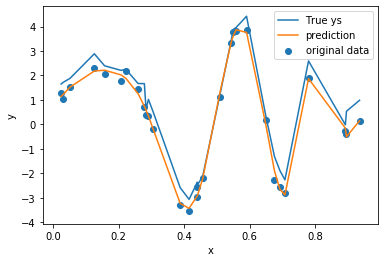

In [243]:
# A3 b1

# trial and plot
K = rbf_kernel(xs,10)
alpha = kernelRidgeRegression(K, ys, reg_lambda = 1e-8)
predict_ys = predict(K, alpha)

plt.plot(xs, true_y,  label = "True ys")
plt.plot(xs, predict_ys, label = "prediction")
plt.scatter(xs, ys, label = "original data")
plt.legend()

plt.xlabel("x")
plt.ylabel("y")
plt.savefig("A3b rbf kernel")

In [246]:
# A3 c1
def tail_bound(kernel, xs, ys):
    B = 300


    idx1 = (int)(B*0.05)
    idx2 = (int)(B*0.95)
#     if kernel == "rbf":
#         K = rbf_kernel(xs, 100)
#     else: # poly
#         K = poly_kernel(xs, 27)
    # confidence 
    y_preds_stack = np.array([])

    
    pred_stack = None
    for b in range(B):
        rand_idx = np.random.randint(30, size = n)
        xs_bs = xs[rand_idx]
        ys_bs = ys[rand_idx]
        
        sort_idx = np.argsort(xs_bs)
        xs_bs = xs_bs[sort_idx]
        ys_bs = ys_bs[sort_idx]
        if kernel == "rbf":
            K_rand = rbf_kernel(xs_bs,100)
            alpha = kernelRidgeRegression(K_rand, ys_bs, reg_lambda = 1e-13)
            K = rbf_kernel2( xs_bs,xs, 100)
        else:
            K_rand = poly_kernel(xs_bs, 27)
            alpha = kernelRidgeRegression(K_rand, ys_bs, reg_lambda = 1e-5)
            K = poly_kernel2(xs_bs, xs, 27)
        y_preds = predict(K, alpha)

        if pred_stack is None: # empty
            pred_stack  = y_preds
        else:
            pred_stack = np.vstack( (pred_stack, y_preds))
    
    v1s = []
    v2s = []
    for i in range(len(xs)):
        y_preds = pred_stack[:, i]
        y_preds = np.sort(y_preds) # sort y_preds  (increasing) at one data point
        print(y_preds)
        m = len(y_preds) # number preds at x
        v1s.append(y_preds[idx1]) # as sort 
        v2s.append(y_preds[idx2])
    return v1s, v2s

v1s_rbf, v2s_rbf = tail_bound("rbf", xs, ys)
v1s_poly, v2s_poly = tail_bound("poly", xs, ys)

[-6.38355542e+03 -2.96282871e+03 -5.52771772e+02 -5.47271620e+02
 -4.99384183e+02 -4.97957239e+02 -4.27998575e+02 -4.12330403e+02
 -1.98742014e+02 -1.37086179e+02 -1.10745895e+02 -1.08628767e+02
 -9.68409863e+01 -8.91517476e+01 -8.37657291e+01 -8.26257546e+01
 -5.26007228e+01 -5.17818440e+01 -4.27274923e+01 -4.20118771e+01
 -4.18355093e+01 -4.15502224e+01 -3.34896550e+01 -3.13255525e+01
 -3.10492543e+01 -2.85651356e+01 -2.55202359e+01 -2.07055049e+01
 -1.83504233e+01 -1.32101025e+01 -1.02499033e+01 -6.11182737e+00
 -5.09892031e+00 -3.33074188e+00 -2.96768188e+00 -2.70112483e+00
 -2.04690167e+00 -1.38092738e+00 -1.20951310e+00 -8.30566406e-01
 -4.09929067e-01 -1.50680542e-01 -1.34636879e-01 -3.66897583e-02
  1.46154404e-01  2.10792065e-01  3.21774185e-01  4.47897166e-01
  4.91047382e-01  5.36410527e-01  5.67844391e-01  6.01446794e-01
  6.03685603e-01  7.60591216e-01  8.28257084e-01  8.60471447e-01
  9.12037849e-01  9.50904846e-01  1.08368857e+00  1.13047852e+00
  1.13851738e+00  1.17171

[ 0.87331084  0.87753945  0.91920435  0.92977714  0.93476507  0.93882269
  0.94332251  0.94991849  0.95550295  0.95831988  0.95914448  0.96081808
  0.9615802   0.96421118  0.96688138  0.96794159  0.96883795  0.96976722
  0.97035167  0.97071639  0.97627667  0.97743985  0.98150257  0.99070437
  0.99217846  1.00303312  1.00643101  1.00766589  1.01110227  1.0127144
  1.01604277  1.01791719  1.01946226  1.01975543  1.02053839  1.02097879
  1.02148214  1.0237549   1.02526395  1.026183    1.02734032  1.02874515
  1.03426416  1.03597814  1.03699284  1.03888136  1.04593934  1.05012945
  1.05242693  1.05244102  1.05676265  1.05937743  1.06388299  1.06437277
  1.06928421  1.07186882  1.07485913  1.07864817  1.07957644  1.08115655
  1.08233112  1.08325914  1.08428371  1.08572077  1.10251383  1.10408843
  1.10483163  1.10500198  1.10635981  1.10789551  1.10839978  1.1136508
  1.11414051  1.11437027  1.11450858  1.11530812  1.11657992  1.11717512
  1.11732575  1.11787043  1.11845506  1.11907285  1.1

In [122]:
np.sort(np.array([2,1]))

array([1, 2])

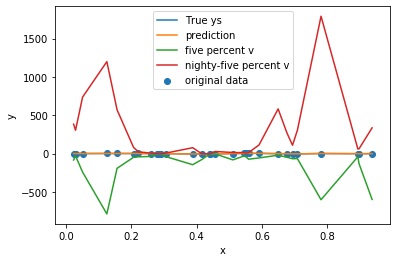

In [247]:
plt.plot(xs, ys,  label = "True ys")
plt.plot(xs, predict_ys, label = "prediction")
plt.plot(xs, v1s_rbf, label = "five percent v")
plt.plot(xs, v2s_rbf, label = "nighty-five percent v")
plt.scatter(xs, ys, label = "original data")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("A3c1 rbf kernel")

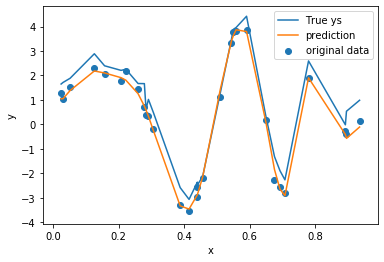

In [244]:
# A3 b2
# trial and plot
K = poly_kernel(xs, 19)
alpha = kernelRidgeRegression(K, ys, reg_lambda = 1e-10)
predict_ys = predict(K, alpha)

plt.plot(xs, true_y,label = "True ys")
plt.plot(xs, predict_ys, label = "prediction")
plt.scatter(xs, ys, label = "original data")
# plt.plot(xs, ys, marker = 'o', label = "data points")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("A3b poly kernel")
plt.show()

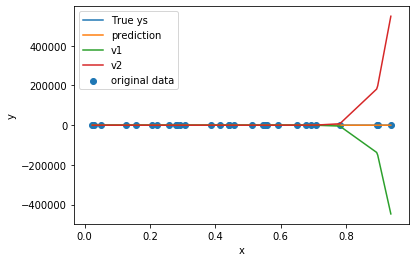

In [248]:
# A3 c2

plt.plot(xs, ys,  label = "True ys")
plt.plot(xs, predict_ys, label = "prediction")
plt.plot(xs, v1s_poly, label = "v1")
plt.plot(xs, v2s_poly, label = "v2")
plt.scatter(xs, ys, label = "original data")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("A3c1 poly kernel")

In [ ]:
def hoeffding( num_samples, num_correct, a= 0, b= 1, delta = 0.05):
    rhs = math.sqrt( (b-a)**2*math.log(2/delta, math.e)/(2* num_samples) )
    mu_conf_interval = ( -rhs+test_error ,  rhs+test_error )
    return mu_conf_interval

In [301]:
n2 = 300
np.random.seed(3)
xs2 = np.random.uniform(size = 300)
xs2 = np.sort(xs)

ys2 = 4*np.sin(math.pi*xs2)*np.cos(6*math.pi*xs2**2) +  np.random.uniform(0,1, size = 300)

true_ys2 = 4*np.sin(math.pi*xs2)*np.cos(6*math.pi*xs2**2)

plt.plot(xs2,ys2)

ValueError: operands could not be broadcast together with shapes (30,) (300,) 